# Load Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, roc_auc_score, roc_curve

In [3]:
data = pd.read_csv("epi_r.csv")

# Clean Data

In [4]:
pd.set_option("max.columns",100)

In [5]:
data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,...,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,utah,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.shape

(20052, 680)

In [7]:
data.isnull().sum()

title                       0
rating                      0
calories                 4117
protein                  4162
fat                      4183
sodium                   4119
#cakeweek                   0
#wasteless                  0
22-minute meals             0
3-ingredient recipes        0
30 days of groceries        0
advance prep required       0
alabama                     0
alaska                      0
alcoholic                   0
almond                      0
amaretto                    0
anchovy                     0
anise                       0
anniversary                 0
anthony bourdain            0
aperitif                    0
appetizer                   0
apple                       0
apple juice                 0
apricot                     0
arizona                     0
artichoke                   0
arugula                     0
asian pear                  0
                         ... 
walnut                      0
wasabi                      0
washington

In [8]:
data.dropna(inplace = True)

In [9]:
data.isnull().sum()

title                    0
rating                   0
calories                 0
protein                  0
fat                      0
sodium                   0
#cakeweek                0
#wasteless               0
22-minute meals          0
3-ingredient recipes     0
30 days of groceries     0
advance prep required    0
alabama                  0
alaska                   0
alcoholic                0
almond                   0
amaretto                 0
anchovy                  0
anise                    0
anniversary              0
anthony bourdain         0
aperitif                 0
appetizer                0
apple                    0
apple juice              0
apricot                  0
arizona                  0
artichoke                0
arugula                  0
asian pear               0
                        ..
walnut                   0
wasabi                   0
washington               0
washington, d.c.         0
watercress               0
watermelon               0
w

In [10]:
data.shape

(15864, 680)

In [11]:
data['rating'].unique()

array([ 2.5  ,  4.375,  3.75 ,  3.125,  1.875,  5.   ,  0.   ,  1.25 ])

In [12]:
data.groupby('rating').count()

,title,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,basil,bass,bastille day,bean,beef,beef rib,beef shank,beef tenderloin,beer,beet,...,tree nut free,triple sec,tropical fruit,trout,tuna,turnip,utah,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
rating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.000,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,...,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296
1.250,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123,123
1.875,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81,81
2.500,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,...,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405,405
3.125,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,...,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165,1165
3.750,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,...,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136,4136
4.375,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,6552,...,6552,6552,6552,6552,6552,6552

In [13]:
pd.set_option("max.columns",100)

In [14]:
data.sum().sort_values(ascending = False)

title                      Lentil, Apple, and Turkey Wrap Boudin Blanc Te...
calories                                                         1.00747e+08
sodium                                                           9.91935e+07
fat                                                               5.5046e+06
protein                                                          1.59155e+06
rating                                                               59663.8
bon appétit                                                             7383
peanut free                                                             6721
soy free                                                                6502
gourmet                                                                 5683
tree nut free                                                           5616
vegetarian                                                              5529
kosher                                                                  4985

In [15]:
data.drop([col for col, val in data.sum().iteritems() if val < 50], axis=1, inplace=True)

In [16]:
data.sum().sort_values(ascending = False)

title                       Lentil, Apple, and Turkey Wrap Boudin Blanc Te...
calories                                                          1.00747e+08
sodium                                                            9.91935e+07
fat                                                                5.5046e+06
protein                                                           1.59155e+06
rating                                                                59663.8
bon appétit                                                              7383
peanut free                                                              6721
soy free                                                                 6502
gourmet                                                                  5683
tree nut free                                                            5616
vegetarian                                                               5529
kosher                                                          

In [17]:
data.shape

(15864, 343)

In [18]:
data.corr()

,rating,calories,protein,fat,sodium,advance prep required,alcoholic,almond,anise,anniversary,appetizer,apple,apricot,artichoke,arugula,asparagus,avocado,back to school,backyard bbq,bacon,bake,banana,basil,bass,bean,beef,beef tenderloin,beer,beet,bell pepper,berry,birthday,bitters,blackberry,blender,blue cheese,blueberry,boil,bon appétit,bourbon,braise,brandy,bread,breakfast,broccoli,broil,brunch,buffet,butter,buttermilk,...,spinach,spirit,spring,squash,steak,steam,stew,stir-fry,strawberry,stuffing/dressing,sugar conscious,sugar snap pea,summer,super bowl,sweet potato/yam,swiss cheese,tailgating,tarragon,tea,tequila,thanksgiving,thyme,tofu,tomatillo,tomato,tortillas,tree nut,tree nut free,triple sec,tuna,turnip,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,vinegar,vodka,walnut,watercress,wedding,wheat/gluten-free,white wine,wine,winter,wok,yogurt,zucchini,turkey
rating,1.000000,0.007855,0.013971,0.007235,0.008146,-0.025939,-0.209148,0.005499,-0.002684,0.010505,0.023534,0.003790,0.009421,-0.004597,0.020244,0.012152,0.011746,0.016151,0.034004,0.028163,0.070332,-0.015264,0.011667,0.006899,0.003317,0.041673,0.025438,0.000728,0.001982,0.023459,0.006232,0.008668,-0.127979,0.007542,0.008222,0.017527,0.008267,0.000245,0.129069,0.004049,0.042613,-0.059976,-0.013182,0.000763,0.000703,0.037252,0.011115,0.020471,-0.029770,-0.024890,...,0.011008,-0.135300,0.027468,0.012092,0.031207,0.007310,0.012482,0.005968,0.001821,0.033148,0.036155,0.001043,0.023999,0.023038,0.021663,0.003772,0.003005,0.000200,-0.050875,-0.010928,0.060912,0.019887,-0.008258,0.022845,0.040270,0.003439,-0.032549,0.069766,-0.022137,0.017412,0.003434,0.014841,0.009048,0.015616,-0.054632,0.022903,0.020139,0.002543,-0.022159,-0.001504,0.001504,-0.001045,0.014778,0.027213,-0.004633,0.058439,0.000602,-0.013485,0.001311,0.022338
calories,0.007855,1.000000,0.742816,0.996538,0.996392,-0.001083,-0.003346,0.000574,-0.001254,-0.001181,-0.004423,0.000206,0.017579,-0.001410,-0.001835,-0.001615,-0.001886,-0.001585,0.000543,-0.002866,0.024090,-0.001453,-0.002772,-0.001021,-0.002676,-0.003230,-0.000936,-0.001102,-0.001648,-0.003165,0.049011,-0.001540,-0.001186,-0.001398,-0.002956,-0.001783,0.054028,-0.002431,-0.008202,-0.001234,0.008802,-0.001925,-0.002733,-0.003095,-0.001167,-0.002518,-0.003394,-0.001345,-0.001532,-0.000957,...,-0.002190,-0.001665,-0.004926,-0.001336,-0.001690,-0.001703,-0.001469,-0.001771,-0.001979,-0.001382,-0.006095,-0.000978,0.006642,-0.001997,-0.001837,-0.001034,-0.001214,-0.001794,-0.001232,-0.001157,0.028044,-0.002092,-0.000972,-0.001126,-0.005553,-0.001326,-0.001141,-0.009015,-0.001081,-0.001249,-0.001118,-0.001661,-0.001908,-0.001307,-0.005392,-0.000926,0.004979,-0.003154,-0.001367,0.048326,-0.001360,-0.001193,-0.000719,-0.002607,-0.001584,0.011178,-0.001222,-0.002496,-0.001979,-0.002267
protein,0.013971,0.742816,1.000000,0.712194,0.749287,-0.001244,-0.005073,0.001528,-0.001644,-0.001344,-0.005876,0.001146,0.009614,-0.001590,-0.002269,-0.001859,-0.002469,-0.001976,0.009556,-0.003144,0.011267,-0.002136,-0.003382,-0.000936,-0.003039,-0.002768,-0.000634,-0.001234,-0.002263,-0.003762,0.028530,-0.002210,-0.001795,-0.002048,-0.003954,-0.002266,0.032407,-0.003193,-0.012255,-0.001708,0.056465,-0.002655,-0.003867,-0.004255,-0.001478,-0.002761,-0.004658,-0.001671,-0.002141,-0.001280,...,-0.002743,-0.002503,-0.006061,-0.001809,-0.001646,-0.002172,-0.001184,-0.002132,-0.002964,-0.001821,-0.007560,-0.001143,0.004042,-0.002139,-0.002348,-0.001222,-0.001332,-0.002091,-0.001800,-0.001690,0.019099,-0.002316,-0.001177,-0.001504,-0.006254,-0.001597,-0.001623,0.000687,-0.001644,-0.001378,-0.001364,-0.002121,-0.002856,-0.000823,-0.007919,0.017960,-0.005666,-0.004082,-0.002044,0.028235,-0.001683,-0.001764,0.009050,-0.002303,-0.001958,0.021620,-0.001437,-0.003120,-0.002566,-0.000748
fat,0.007235,0.996538,0.712194,1.000000,0.986476,-0.001033,-0.003316,0.000612,-0.001217,-0.001123,-0.004207,0.000220,0.017754,-0.001334,-0.001741,-0.001535,-0.001779,-0.001518,-0.002515,-0.002723,

In [19]:
data_corr = data.corr().abs()
sorted_corr = data_corr.unstack()
sortedorder = sorted_corr.sort_values(ascending = False)
sortedorder[343:500]

fat                calories             0.996538
calories           sodium               0.996392
sodium             calories             0.996392
fat                sodium               0.986476
sodium             fat                  0.986476
peanut free        soy free             0.941653
soy free           peanut free          0.941653
kosher             pescatarian          0.878729
pescatarian        kosher               0.878729
drink              alcoholic            0.851959
alcoholic          drink                0.851959
peanut free        tree nut free        0.822871
tree nut free      peanut free          0.822871
soy free           tree nut free        0.793142
tree nut free      soy free             0.793142
sodium             protein              0.749287
protein            sodium               0.749287
pescatarian        vegetarian           0.743036
vegetarian         pescatarian          0.743036
calories           protein              0.742816
protein            c

In [20]:
data.set_index('title', inplace = True)

In [21]:
data.head()

,rating,calories,protein,fat,sodium,advance prep required,alcoholic,almond,anise,anniversary,appetizer,apple,apricot,artichoke,arugula,asparagus,avocado,back to school,backyard bbq,bacon,bake,banana,basil,bass,bean,beef,beef tenderloin,beer,beet,bell pepper,berry,birthday,bitters,blackberry,blender,blue cheese,blueberry,boil,bon appétit,bourbon,braise,brandy,bread,breakfast,broccoli,broil,brunch,buffet,butter,buttermilk,...,spinach,spirit,spring,squash,steak,steam,stew,stir-fry,strawberry,stuffing/dressing,sugar conscious,sugar snap pea,summer,super bowl,sweet potato/yam,swiss cheese,tailgating,tarragon,tea,tequila,thanksgiving,thyme,tofu,tomatillo,tomato,tortillas,tree nut,tree nut free,triple sec,tuna,turnip,valentine's day,vanilla,veal,vegan,vegetable,vegetarian,vinegar,vodka,walnut,watercress,wedding,wheat/gluten-free,white wine,wine,winter,wok,yogurt,zucchini,turkey
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The Best Blts,4.375,948.0,19.0,79.0,1042.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Apply Models

In [22]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [23]:
#Assign features to variable X
X = data.drop("rating", axis = 1)
#Assign target column to variable y
y = data.rating

In [24]:
#Intialize scaler

scaler = StandardScaler()

#Fit and transform X data using standard scaler

Xs = scaler.fit_transform(X)

# Conduct PCA to eliminate problems with collinearity

In [25]:
#Intialize PCA object and do not do train test split for now
#We're deliberating leaving the n_components parameters alone

pca = PCA()

#Fit and transform x_train use pca

Xs_pca = pca.fit_transform(Xs)

#Number of components
pca.n_components_

341L

In [26]:
#Shows the percentage of the variance explained by each component
pca.explained_variance_ratio_

array([  2.14297709e-02,   1.72430148e-02,   1.38110224e-02,
         1.06953709e-02,   1.02098226e-02,   9.13792552e-03,
         8.50542521e-03,   7.59439538e-03,   6.98279723e-03,
         6.96539321e-03,   6.90106886e-03,   6.48494970e-03,
         6.40844959e-03,   6.34008815e-03,   6.05957152e-03,
         5.95183280e-03,   5.80366482e-03,   5.69925319e-03,
         5.56648094e-03,   5.41084093e-03,   5.32589144e-03,
         5.24449289e-03,   5.03375232e-03,   4.91941932e-03,
         4.90592889e-03,   4.80416916e-03,   4.78122248e-03,
         4.71389451e-03,   4.68177648e-03,   4.63317925e-03,
         4.59123436e-03,   4.50648012e-03,   4.47737052e-03,
         4.44479353e-03,   4.40290288e-03,   4.30324368e-03,
         4.29111532e-03,   4.21214827e-03,   4.16654445e-03,
         4.13898107e-03,   4.11182709e-03,   4.05994631e-03,
         4.04250446e-03,   3.99619189e-03,   3.95682084e-03,
         3.92786311e-03,   3.90805398e-03,   3.90506488e-03,
         3.85681437e-03,

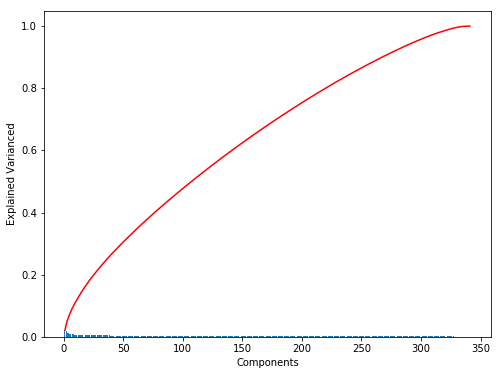

In [27]:
plt.figure(figsize=(8, 6))

components = range(1, pca.n_components_ + 1)

plt.bar(components, pca.explained_variance_ratio_, label = "Explained Variance Ratio")
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), c = "r", label = "Cumulative Sum of Explained Variance ratios")
plt.xlabel("Components")
plt.ylabel("Explained Varianced")

# Apply PCA on Total Data with Linear Regression Model and See the CV Score

In [28]:
pca_range = range(20, 340, 20)

cv_scores = []

for i in pca_range:
    pca = PCA(n_components= i)
    Xs_pca = pca.fit_transform(Xs)
    cv = cross_val_score(LinearRegression(), Xs_pca, y, cv = 5, scoring = "r2")
    cv_mean = cv.mean()
    cv_scores.append(cv_mean)

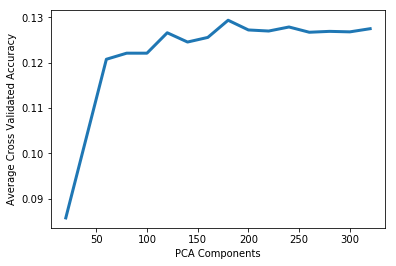

In [29]:
plt.plot(pca_range, cv_scores, linewidth = 3)
plt.xlabel("PCA Components")
plt.ylabel("Average Cross Validated Accuracy");

In [30]:
#See how many components lead to max CV score

#Put scores in a data frame
PCA_CV_Scores = pd.DataFrame(list(zip(pca_range, cv_scores)), columns=["PCA Components", "CV Score"])
PCA_CV_Scores 

#Locate the max point
PCA_CV_Scores.loc[PCA_CV_Scores['CV Score'].idxmax()]

PCA Components    180.000000
CV Score            0.129328
Name: 8, dtype: float64

# Use 140 Components To Fit Models

In [31]:
#Test Linear Regression Model

#Initialize PCA with 140 components
pca = PCA(n_components=140)

#Fit and transform x_train use pca
Xs_pca = pca.fit_transform(Xs)



# Try with Linear Regression Model

In [32]:
#Initialize and fit linear regression model
lr = LinearRegression()
lr.fit(Xs_pca, y)
lr.score(Xs_pca ,y)


0.14179977982393654

In [33]:
#Check the cross-validated score

cross_val_score(LinearRegression(), Xs_pca, y, cv = 5, scoring = "r2").mean()

0.12545113929860163

# Try Ridge and Lasso to see if it improves scores

In [34]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score;

In [35]:
#Fit and score a ridge regression model with alpha = 10
ridge = Ridge(alpha=10)
ridge.fit(Xs_pca, y)
ridge.score(Xs_pca, y)

0.14179976373396919

In [36]:
#Ridge regression cross-validation
cross_val_score(Ridge(10), Xs_pca, y, cv = 5, scoring = "r2").mean()

0.12546317624205011

In [37]:
#Fit and score a lasso regression model with alpha = 1

lasso = Lasso(alpha=0.01)
lasso.fit(Xs_pca, y)
lasso.score(Xs_pca, y)

0.13642669978947963

#Lasso regression cross-validation
cross_val_score(Lasso(0.01), Xs_pca, y, cv = 5, scoring = "r2").mean()

Ridge and lasso don't improve the model performance, expected because PCA was already conducted

# Use a decision tree regressor and see what the results are

In [38]:
#Lets make this a for loop

#Intialize list that we'll use for our testing scores
testscorelist = []

#Iterate over range 10
for i in range(10):
    #Split data, fit model, test data, append testing score to testscorelist
    X_train, X_test, y_train, y_test = train_test_split(Xs_pca ,y, test_size = .25)
    #Fit model
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    #Score on testing set
    ts = model.score(X_test, y_test)
    testscorelist.append(ts)

testscorelist

[-0.54875920514489107,
 -0.58888928225970782,
 -0.53308810065373002,
 -0.52709242743066764,
 -0.67532887371434858,
 -0.63308313861705123,
 -0.65392418925453266,
 -0.57494472895539395,
 -0.58796621698777729,
 -0.51035377501269497]

# Try to use polynomial regression and see if that improves score

In [40]:
#Transform the features to 2-degrees
poly = PolynomialFeatures(2)
Xp = poly.fit_transform(Xs_pca)

In [41]:
#Fit linear regression model on the Xp features and evaluate it on itself
lr_poly = LinearRegression()

In [43]:
lr_poly.fit(Xp, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [ ]:
#lr_poly.score(Xp, y)

In [ ]:
#cross_val_score(LinearRegression(), Xp, y, cv = 5, scoring = "r2").mean()

In [ ]:
#Try a few degrees and see what the output is

#for degree in [1, 2, 3, 4, 5]:
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    
    # Compute a few R2 scores and print average performance
    #scores = []
    
    #for k in range(5):
        #X_train, X_test, y_train, y_test = train_test_split(Xs_pca, y, train_size=.7)
        #scores.append(model.fit(X_train, y_train).score(X_test, y_test))
    #print ("For degree", degree, ", R2 =", np.mean(scores))